### Redes Neurais e Arquiteturas Profundas
#### **MBA em Ciências de Dados**

### *Módulo 1 - Introdução ao Aprendizado Profundo*

Moacir A. Ponti - ICMC/USP

-

## Exemplo de uso de redes neurais profundas com dados estruturados

### Problema: Classificação de cidades segundo sua população, UF e PIB



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

df = pd.read_csv("vw_pib_percapita_clean.csv")
df = df.dropna()

In [ ]:
df

,UF,PIB,Pop_est_2009,classe
0,BAHIA,5.788399e+04,18433,1
1,RIO GRANDE DO SUL,4.572388e+04,4000,2
2,ESPIRITO SANTO,1.978263e+07,320156,4
3,MINAS GERAIS,2.478160e+05,21424,2
4,PIAUÍ,2.095138e+04,7895,1
...,...,...,...,...
5561,SANTA CATARINA,1.876289e+05,9737,2
5562,PARANÁ,1.385535e+05,13983,2
5563,SÃO PAULO,5.320191e+05,29639,2
5564,RIO GRANDE DO SUL,2.198064e+04,3067,1


Vamos obter uma codificação numérica para o estado (UF)

In [ ]:
ufcode = df['UF'].astype("category").cat.codes
df.insert(1,"UF_code", ufcode.astype(float))
df

,UF,UF_code,PIB,Pop_est_2009,classe
0,BAHIA,4.0,5.788399e+04,18433,1
1,RIO GRANDE DO SUL,20.0,4.572388e+04,4000,2
2,ESPIRITO SANTO,7.0,1.978263e+07,320156,4
3,MINAS GERAIS,12.0,2.478160e+05,21424,2
4,PIAUÍ,17.0,2.095138e+04,7895,1
...,...,...,...,...,...
5561,SANTA CATARINA,23.0,1.876289e+05,9737,2
5562,PARANÁ,13.0,1.385535e+05,13983,2
5563,SÃO PAULO,25.0,5.320191e+05,29639,2
5564,RIO GRANDE DO SUL,20.0,2.198064e+04,3067,1


## Vamos tentar discriminar cidades de classe 1 e 2 das demais

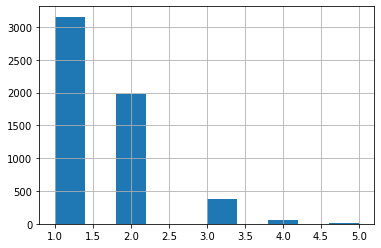

In [ ]:
df['classe'].hist()

In [ ]:
df['classe'].value_counts()

1    3157
2    1977
3     376
4      51
5       5
Name: classe, dtype: int64

### Vamos converter o dataframe para numpy array e depois separar as features (entrada) dos alvos (saída)

In [ ]:
nparray = df.to_numpy()

In [ ]:
features = nparray[:,1:-1]
targets = nparray[:,-1] > 2
print("Features = ", features.shape)
print("Targets = ", targets.shape)

Features =  (5566, 3)
Targets =  (5566,)


### 1) Preparando conjuntos de treinamento e teste

Aqui vou fazer de forma simples pois quero apenas mostrar o treinamento da rede, pegando os 20% primeiros

In [ ]:
num_inst_teste = int(len(features)*0.2)
train_feats = features[:-num_inst_teste].astype(float)
train_labels = targets[:-num_inst_teste].astype(int)

test_feats = features[-num_inst_teste:].astype(float)
test_labels = targets[-num_inst_teste:].astype(int)

print("Exemplos de treinamento:", len(train_feats))
print("Exemplos de teste:", len(test_feats))

Exemplos de treinamento: 4453
Exemplos de teste: 1113


In [ ]:
train_feats

array([[4.00000000e+00, 5.78839922e+04, 1.84330000e+04],
       [2.00000000e+01, 4.57238750e+04, 4.00000000e+03],
       [7.00000000e+00, 1.97826280e+07, 3.20156000e+05],
       ...,
       [8.00000000e+00, 3.64961094e+05, 9.96500000e+03],
       [9.00000000e+00, 1.51116203e+05, 2.16720000e+04],
       [2.00000000e+01, 4.30799180e+04, 1.57400000e+03]])

In [ ]:
train_labels

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
test_feats

array([[5.00000000e+00, 3.72566094e+04, 8.50000000e+03],
       [1.30000000e+01, 3.44051133e+04, 4.17600000e+03],
       [1.30000000e+01, 1.12631172e+05, 1.41890000e+04],
       ...,
       [2.50000000e+01, 5.32019125e+05, 2.96390000e+04],
       [2.00000000e+01, 2.19806367e+04, 3.06700000e+03],
       [2.00000000e+01, 5.71501719e+04, 5.62300000e+03]])

In [ ]:
counts_train = np.bincount(train_labels)
counts_test = np.bincount(test_labels)

print("Porcentagem da classe minoritária treinamento: {} ({:.2f}% of total)".format(
        counts_train[1], 100 * float(counts_train[1]) / len(train_labels)
    ))

print("Porcentagem da classe minoritária teste: {} ({:.2f}% of total)".format(
        counts_test[1], 100 * float(counts_test[1]) / len(test_labels)
    ))

Porcentagem da classe minoritária treinamento: 338 (7.59% of total)
Porcentagem da classe minoritária teste: 94 (8.45% of total)


## 2) Montando a rede neural para classificação

Utilizaremos primeiro uma rede rasa (MLP convencional)

In [ ]:
model1 = keras.Sequential(
    [
        keras.layers.Dense(
            16, activation="relu", input_shape=(train_feats.shape[-1],)
        ),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


Vamos treinar a rede, mas utilizaremos métricas alternativas que iremos computar como: Precisão e Revocação, pois a base é muito desbalanceada

In [ ]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

# compilamos o modelo utilizando:
#- um otimizador SGD
#- a função de perda entropia cruzada
#- as métricas acima
model1.compile(
    optimizer=keras.optimizers.SGD(1e-1), loss="binary_crossentropy", metrics=metrics
)

Ajustando o modelo!

Aqui aparece o **batchsize**, que definimos como 100

E também o número de épocas (**epochs**). Uma época ocorre após as iterações (cada batch) completarem o total de exemplos de treinamento

Exemplo: nesse caso temos 5566 exemplos de treinamento. Com batchs de 100, precisaremos de 5566/1000 iterações para alcançar 1 época.

Isso significa que após 56 iterações (batchs selecionados) teremos uma época

In [ ]:
5566/100

55.66

In [ ]:
history1 = model1.fit(
    train_feats,
    train_labels,
    batch_size=100,
    epochs=30,
    verbose=2,
    validation_data=(test_feats, test_labels),
)

Epoch 1/30
45/45 - 1s - loss: 636772941824.0000 - fn: 331.0000 - fp: 93.0000 - tn: 4022.0000 - tp: 7.0000 - precision: 0.0700 - recall: 0.0207 - val_loss: 0.3657 - val_fn: 94.0000 - val_fp: 0.0000e+00 - val_tn: 1019.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
45/45 - 0s - loss: 0.3207 - fn: 338.0000 - fp: 0.0000e+00 - tn: 4115.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3117 - val_fn: 94.0000 - val_fp: 0.0000e+00 - val_tn: 1019.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
45/45 - 0s - loss: 0.2874 - fn: 338.0000 - fp: 0.0000e+00 - tn: 4115.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2970 - val_fn: 94.0000 - val_fp: 0.0000e+00 - val_tn: 1019.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
45/45 - 0s - loss: 0.2766 - fn: 338.0000 - fp: 0.0000e+00 - tn: 4115.0000 - tp: 0.0000e+00 - pre

Com o Keras podemos plotar as funções de perda ao longo do treinamento

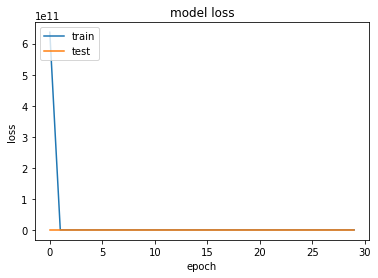

In [ ]:
plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()


In [ ]:
# Computando as métricas para o teste
score = model1.evaluate(test_feats, test_labels, verbose=0)

In [ ]:
print("Falsos negativos: ", score[1])
print("Falsos positivos: ", score[2])
print("Verdadeiros negativos: ", score[3])
print("Verdadeiros positivos: ", score[4])
print("Precisao: ", score[5])
print("Revocacao: ", score[6])

Falsos negativos:  94.0
Falsos positivos:  0.0
Verdadeiros negativos:  1019.0
Verdadeiros positivos:  0.0
Precisao:  0.0
Revocacao:  0.0


In [ ]:
model1.reset_states() 

## 3) Melhorando o classificador

1. Ponderar as classes pois estão muito desbalanceadas
2. Normalizar os atributos

In [ ]:
# normalizacao z-score
# calculamos média e desvio no treinamento e aplicamos em treinamento e teste
mean = np.mean(train_feats, axis=0)
train_feats -= mean
test_feats -= mean

std = np.std(train_feats, axis=0)
train_feats /= std
test_feats /= std

In [ ]:
# vamos ponderar o total de cada classe e formar um peso
peso_0 = 1.0 / counts_train[0]
peso_1 = 1.0 / counts_train[1]

# ponderacao das classes
class_weight = {0: peso_0, 1: peso_1}

In [ ]:
model2 = keras.Sequential(
    [
        keras.layers.Dense(
            16, activation="relu", input_shape=(train_feats.shape[-1],)
        ),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model2.summary()

# compilamos o modelo utilizando:
#- um otimizador SGD
#- a função de perda entropia cruzada
#- as métricas acima
model2.compile(
    optimizer=keras.optimizers.SGD(1e-1), loss="binary_crossentropy", metrics=metrics
)

history2 = model2.fit(
    train_feats,
    train_labels,
    batch_size=100,
    epochs=30,
    verbose=1,
    validation_data=(test_feats, test_labels),
    class_weight=class_weight,
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
45/45 [==============================] - 1s 14ms/step - loss: 2.9863e-04 - fn: 213.0000 - fp: 1380.0000 - tn: 3754.0000 - tp: 219.0000 - precision: 0.1370 - recall: 0.5069 - val_loss: 0.6125 - val_fn: 42.0000 - val_fp: 351.0000 - val_tn: 668.0000 - val_tp: 52.0000 - val_precision: 0.1290 - val_recall: 0.5532
Epoch 2/30
45/45 [==============================] - 0s 2ms/step - loss: 2.9841e-04 - fn: 119.0000 - fp: 1380.0000 - tn: 2735.0000 - tp: 219.0000 - precision: 0.1370 - recall: 0.6479 - val_loss: 0.612

In [ ]:
# Computando as métricas para o teste
score = model2.evaluate(test_feats, test_labels, verbose=0)
print("Falsos negativos: ", score[1])
print("Falsos positivos: ", score[2])
print("Verdadeiros negativos: ", score[3])
print("Verdadeiros positivos: ", score[4])
print("Precisao: ", score[5])
print("Revocacao: ", score[6])

Falsos negativos:  41.0
Falsos positivos:  359.0
Verdadeiros negativos:  660.0
Verdadeiros positivos:  53.0
Precisao:  0.1286407709121704
Revocacao:  0.563829779624939


In [ ]:
model2.reset_states() 

## 4) É possível melhorar ainda mais?

Vamos montar uma rede profunda!

In [ ]:
model3 = keras.Sequential(
    [
        keras.layers.Dense(
            16, activation="relu", input_shape=(train_feats.shape[-1],)
        ),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model3.summary()

# compilamos o modelo utilizando:
#- um otimizador SGD
#- a função de perda entropia cruzada
#- as métricas acima
model3.compile(
    optimizer=keras.optimizers.SGD(1e-1), loss="binary_crossentropy", metrics=metrics
)

history3 = model3.fit(
    train_feats,
    train_labels,
    batch_size=100,
    epochs=30,
    verbose=1,
    validation_data=(test_feats, test_labels),
    class_weight=class_weight,
)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                64        
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
45/45 [==============================] - 1s 14ms/step - loss: 3.0423e-04 - fn: 119.0000 - fp: 2869.0000 - tn: 2265.0000 - tp: 313.0000 - precision: 0.0984 - recall: 0.7245 - val_loss: 0.7350 - val_fn: 9.0000 - val_fp: 695.0000 - val_tn: 324.00

In [ ]:
# Computando as métricas para o teste
score = model3.evaluate(test_feats, test_labels, verbose=0)
print("Falsos negativos: ", score[1])
print("Falsos positivos: ", score[2])
print("Verdadeiros negativos: ", score[3])
print("Verdadeiros positivos: ", score[4])
print("Precisao: ", score[5])
print("Revocacao: ", score[6])

Falsos negativos:  11.0
Falsos positivos:  454.0
Verdadeiros negativos:  565.0
Verdadeiros positivos:  83.0
Precisao:  0.15456238389015198
Revocacao:  0.8829787373542786


In [ ]:
model3.reset_states() 